# Artificial Intelligence Project - Jasmine, 991490852

In [3]:
pip install pycaret  #installing pycaret


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd #importing pandas
dataset = pd.read_csv('abalone.data') #reading abalone dataset

In [5]:
dataset.shape #checking the shape of data
dataset #printing contents of data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
data = dataset.sample(frac=0.9, random_state=786) #sample of dataset
data_unseen = dataset.drop(data.index) #dropping unseen data to be used for predictions

data.reset_index(drop=True, inplace=True) #resetting the dataset
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape)) #Printing the data for modeling
print('Unseen Data For Predictions: ' + str(data_unseen.shape)) #Number of dropped data

Data for Modeling: (3758, 9)
Unseen Data For Predictions: (418, 9)


In [7]:
from pycaret.classification import *
#setting the environment in pycaret
#creating pre-processing pipeline
exp_mclf101 = setup(data = data, target = 'M', session_id=123) 


,Description,Value
0,session_id,123
1,Target,M
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(3758, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
#Comparing Models to evaluate performance
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5532,0.7459,0.5521,0.5438,0.5441,0.3252,0.3280,0.1310
lr,Logistic Regression,0.5498,0.7527,0.5450,0.5404,0.5271,0.3168,0.3264,0.3730
ridge,Ridge Classifier,0.5468,0.0000,0.5441,0.5323,0.5205,0.3149,0.3248,0.0180
lda,Linear Discriminant Analysis,0.5460,0.7446,0.5436,0.5393,0.5334,0.3125,0.3176,0.0060
et,Extra Trees Classifier,0.5445,0.7398,0.5461,0.5380,0.5397,0.3142,0.3151,0.0650
ada,Ada Boost Classifier,0.5430,0.7262,0.5375,0.5288,0.5209,0.3067,0.3157,0.0240
rf,Random Forest Classifier,0.5426,0.7425,0.5435,0.5369,0.5382,0.3107,0.3117,0.0730
lightgbm,Light Gradient Boosting Machine,0.5399,0.7326,0.5420,0.5351,0.5364,0.3075,0.3081,0.0900
svm,SVM - Linear Kernel,0.5316,0.0000,0.5200,0.4382,0.4410,0.2838,0.3454,0.0240
qda,Quadratic Discriminant Analysis,0.5243,0.7319,0.5377,0.5114,0.4958,0.2937,0.3060,0.0060


In [9]:
#Creating Model - GBC
gbc= create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5323,0.7249,0.5317,0.5196,0.5227,0.2943,0.2960
1,0.5627,0.7590,0.5586,0.5489,0.5449,0.3371,0.3440
2,0.5361,0.7582,0.5369,0.5183,0.5213,0.3005,0.3037
3,0.5285,0.7137,0.5259,0.5250,0.5223,0.2860,0.2889
4,0.5741,0.7447,0.5746,0.5643,0.5672,0.3583,0.3595
5,0.5247,0.7244,0.5205,0.5162,0.5119,0.2792,0.2842
6,0.5323,0.7406,0.5338,0.5185,0.5234,0.2967,0.2978
7,0.5741,0.7670,0.5745,0.5689,0.5682,0.3563,0.3586
8,0.5779,0.7637,0.5780,0.5742,0.5758,0.3657,0.3658
9,0.5894,0.7629,0.5866,0.5837,0.5828,0.3783,0.3813


In [10]:
#Trained Model object stored in 'dt'
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [11]:
#Creating Model K Neighbors Classifier
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5209,0.7009,0.5244,0.5179,0.5179,0.2818,0.2826
1,0.5057,0.7054,0.5142,0.4927,0.4958,0.2608,0.2626
2,0.5323,0.7448,0.5381,0.5203,0.5230,0.2996,0.3014
3,0.4411,0.6369,0.4476,0.4422,0.4389,0.1645,0.1658
4,0.4791,0.6568,0.4871,0.4654,0.4673,0.2219,0.2241
5,0.4753,0.6706,0.4776,0.4730,0.4739,0.2096,0.2097
6,0.5437,0.7107,0.5518,0.5443,0.5364,0.3196,0.3240
7,0.4829,0.6903,0.4896,0.4868,0.4834,0.2254,0.2263
8,0.5095,0.7091,0.5102,0.5090,0.5089,0.2636,0.2639
9,0.4981,0.7077,0.5033,0.4848,0.4898,0.2476,0.2484


In [12]:
#Trained Model object stored in 'knn'
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [13]:
#Creating Model - Logistic Regression
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4981,0.7048,0.4938,0.4774,0.4726,0.2385,0.2455
1,0.5741,0.7642,0.5691,0.5497,0.5472,0.3548,0.3641
2,0.5323,0.7581,0.5271,0.5158,0.4956,0.2900,0.3041
3,0.4905,0.7296,0.4867,0.4873,0.4766,0.2264,0.2321
4,0.5437,0.7390,0.5379,0.5479,0.5190,0.3067,0.3193
5,0.5399,0.7455,0.5352,0.5431,0.5197,0.3016,0.3119
6,0.5589,0.7570,0.5551,0.5505,0.5371,0.3323,0.3416
7,0.5894,0.7695,0.5859,0.5777,0.5692,0.3774,0.3864
8,0.5856,0.7798,0.5786,0.5714,0.5653,0.3709,0.3793
9,0.5856,0.7799,0.5802,0.5830,0.5685,0.3699,0.3797


In [14]:
#Trained Model object stored in 'lr'
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [15]:
#Tuning Model's hyperparameters automatically using Pycaret
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5171,0.7285,0.5144,0.4982,0.5020,0.2694,0.2725
1,0.5627,0.7519,0.5602,0.5408,0.5435,0.3389,0.3441
2,0.5551,0.7719,0.5530,0.5455,0.5373,0.3271,0.3340
3,0.5171,0.7154,0.5136,0.5110,0.5067,0.2675,0.2720
4,0.5475,0.7396,0.5481,0.5350,0.5386,0.3177,0.3192
5,0.5323,0.7454,0.5253,0.5223,0.5095,0.2881,0.2987
6,0.5589,0.7527,0.5596,0.5463,0.5498,0.3373,0.3389
7,0.5894,0.7708,0.5857,0.5888,0.5773,0.3766,0.3846
8,0.5779,0.7816,0.5765,0.5686,0.5727,0.3645,0.3648
9,0.6046,0.7741,0.5969,0.6014,0.5895,0.3982,0.4086


In [16]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [17]:
#Tuning KNN
tuned_knn = tune_model(knn,custom_grid = {'n_neighbors': np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5513,0.7233,0.5472,0.5418,0.5444,0.3220,0.3234
1,0.5513,0.7343,0.5512,0.5318,0.5360,0.3236,0.3269
2,0.4981,0.7465,0.4972,0.4790,0.4795,0.2407,0.2451
3,0.5247,0.7250,0.5263,0.5188,0.5208,0.2841,0.2846
4,0.4677,0.7030,0.4699,0.4503,0.4557,0.1972,0.1985
5,0.4867,0.7008,0.4852,0.4845,0.4785,0.2220,0.2254
6,0.5209,0.7365,0.5242,0.5103,0.5133,0.2816,0.2828
7,0.5513,0.7460,0.5494,0.5373,0.5381,0.3208,0.3249
8,0.5513,0.7596,0.5517,0.5364,0.5421,0.3251,0.3261
9,0.5627,0.7649,0.5617,0.5485,0.5521,0.3393,0.3415


In [18]:
#Tuning Logistic Regression
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5171,0.7090,0.5156,0.4991,0.4981,0.2695,0.2745
1,0.5932,0.7677,0.5893,0.5718,0.5690,0.3844,0.3930
2,0.5247,0.7631,0.5220,0.5040,0.4928,0.2803,0.2910
3,0.4905,0.7342,0.4896,0.4778,0.4782,0.2298,0.2326
4,0.5627,0.7467,0.5586,0.5563,0.5408,0.3377,0.3475
5,0.5437,0.7499,0.5415,0.5372,0.5247,0.3097,0.3176
6,0.5817,0.7621,0.5817,0.5695,0.5645,0.3698,0.3766
7,0.5703,0.7697,0.5700,0.5544,0.5532,0.3506,0.3560
8,0.5970,0.7802,0.5955,0.5828,0.5862,0.3926,0.3949
9,0.5894,0.7804,0.5882,0.5822,0.5781,0.3784,0.3831


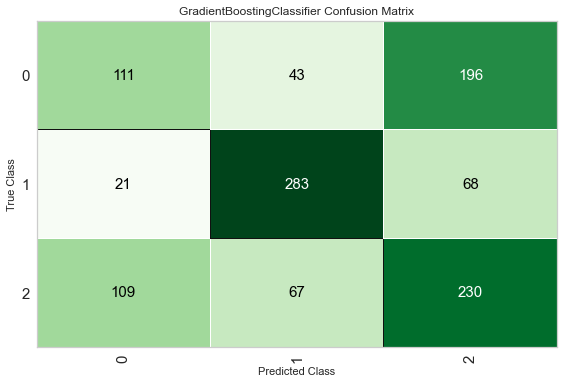

In [19]:
#Confusion Matrix for GBC
plot_model(tuned_gbc, plot = 'confusion_matrix')

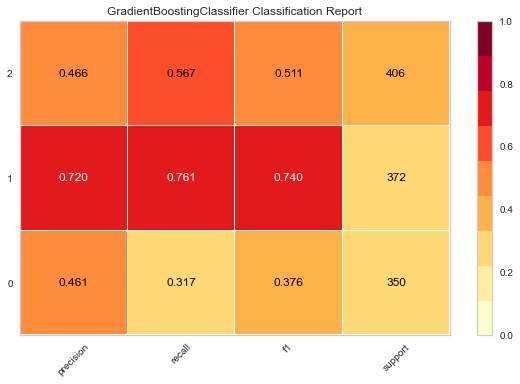

In [20]:
#Classification Report for KNN Model
plot_model(tuned_gbc, plot = 'class_report')

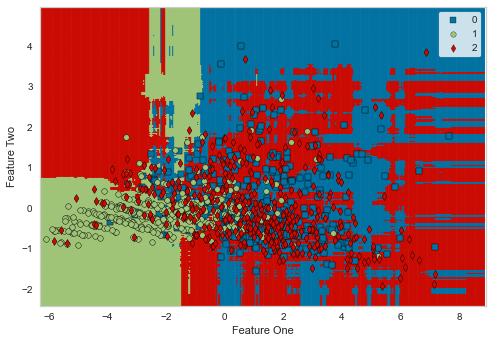

In [21]:
#Decision Boundary for model KNN
plot_model(tuned_gbc,plot='boundary')

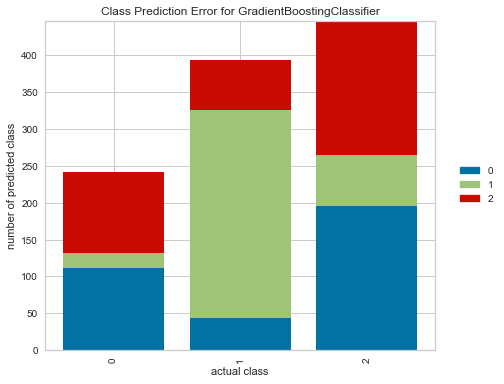

In [22]:
#Prediction Error in the Model KNN
plot_model(tuned_gbc,plot='error')

In [23]:
#Providing User Interface using 'evaluate_model' for all available plots
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
#Predicting the Model for final check
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5532,0.7637,0.5481,0.5480,0.5445,0.3242,0.3282


,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,M,Label,Score
0,0.600,0.460,0.150,1.2350,0.6025,0.2740,0.2900,8.0,F,M,0.5853
1,0.375,0.245,0.100,0.3940,0.1660,0.0910,0.1125,6.0,I,I,0.6139
2,0.550,0.450,0.145,0.7410,0.2950,0.1435,0.2665,10.0,F,I,0.4633
3,0.540,0.425,0.135,0.6860,0.3475,0.1545,0.2130,8.0,I,I,0.4180
4,0.425,0.340,0.100,0.3515,0.1625,0.0820,0.0940,7.0,I,I,0.7795
...,...,...,...,...,...,...,...,...,...,...,...
1123,0.645,0.505,0.150,1.1605,0.5190,0.2615,0.3350,10.0,M,F,0.4550
1124,0.580,0.455,0.170,0.9075,0.3740,0.2135,0.2850,13.0,F,F,0.4421
1125,0.600,0.470,0.130,1.0105,0.4230,0.2190,0.2980,9.0,M,M,0.4789
1126,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.2750,13.0,I,F,0.4651


In [25]:
#Finalizing the Model
final_gbc = finalize_model(tuned_gbc)

In [26]:
#Final K Nearest Neighbour parameters for deployment
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [66]:
#Predicting on unseen data which was dropped before
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,Label,Score
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,M,0.5152
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,F,0.3636
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10,M,0.4848
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,I,0.4545
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10,M,0.5455


In [28]:
#Saving the Model
save_model(final_gbc, 'Final GBC Model for Artificial Intelligence Project 08Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='M',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             mi

In [29]:
#Loading the saved model
saved_final_gbc = load_model('Final GBC Model for Artificial Intelligence Project 08Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [30]:
#Applying loaded model to unseen data
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

In [31]:
new_prediction.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,Label,Score
0,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,M,0.4484
1,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11,M,0.3820
2,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185,10,M,0.3842
3,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,I,0.5647
4,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305,10,M,0.4486
